In [2]:
import numpy as np
import pandas as pd
import sklearn

In [3]:
from sklearn.datasets import load_boston
df=load_boston()

In [4]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(df.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
boston=pd.DataFrame(df.data,columns=df.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston["MEDV"]=df.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,dhanesh,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


In [11]:
boston.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,dhanesh,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dhanesh    0
MEDV       0
dtype: int64

In [19]:
  from sklearn.model_selection import train_test_split
  X=boston.drop("MEDV",axis=1)
  Y=boston["MEDV"]
  X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20,random_state=5)
  print(X_train.shape)
  print(X_test.shape)
  print(Y_train.shape)
  print(Y_test.shape)

(404, 14)
(102, 14)
(404,)
(102,)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
lin_model= LinearRegression()
lin_model.fit(X_train,Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_train_predict = lin_model.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,y_train_predict)))
print(" the model performance for traning set")
print("\n")
print("rmse is {}".format(rmse))


 the model performance for traning set


rmse is 7.34235974193877e-14


In [28]:
y_test_predict=lin_model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(Y_test,y_test_predict)))
print(" the model performance for traning set")
print("rmse is {}".format(rmse))

 the model performance for traning set
rmse is 8.192287772078598e-14


Text(0, 0.5, 'predicted')

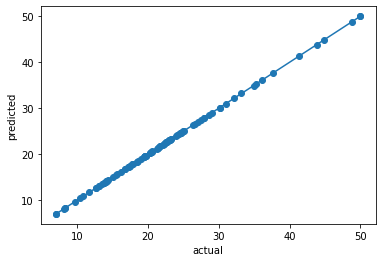

In [32]:
#you said dont need to code bruh for my notes and understanding i wrote it cool right see everything is on line
import matplotlib.pyplot as plt
plt.scatter(Y_test,y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)])
plt.xlabel("actual")
plt.ylabel("predicted")